### SVD - kompresja obrazu

(1197, 1200)


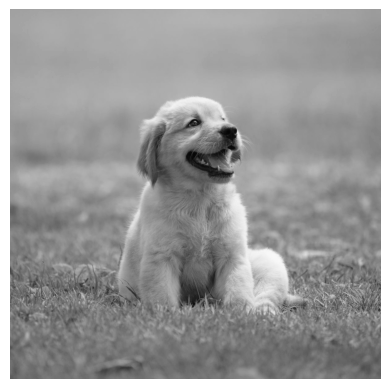

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
# plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('..','Dane','Obrazy','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale
print(X.shape)

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()


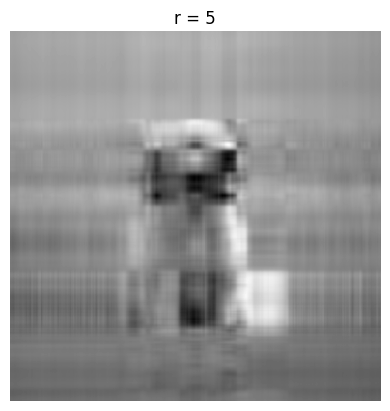

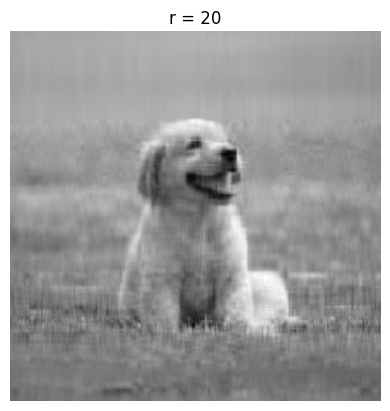

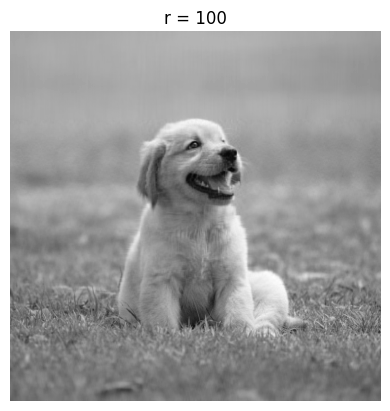

In [5]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

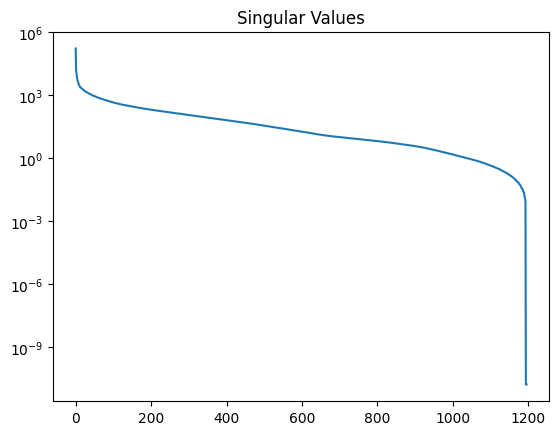

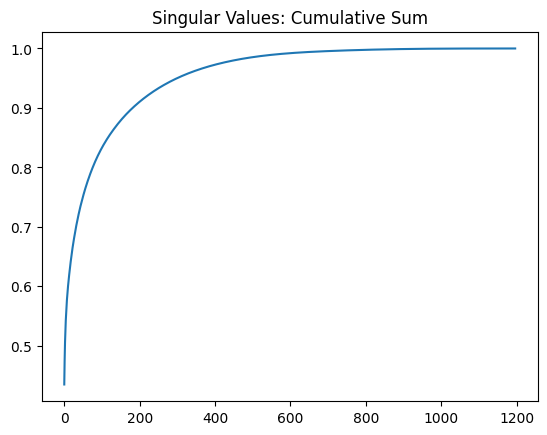

In [8]:
plt.figure(1)
plt.semilogy(np.diag(S))  # ile energii tłumaczy wartość
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))  # ile energii przetłumaczone
plt.title('Singular Values: Cumulative Sum')
plt.show()

### Zaprojektować wyszukiwarkę: dla danego zapytania znaleźć tekst najbardziej adekwatny.

Podstawowy sposób reprezentacji tekstu to macierz wystąpień słów w dokumentach - oznacza to bardzo duży wymiar danych...

Dlatego potrzebna redukcja. Pomysł: wykryć znaczenie tekstu znajdując ukryte cechy.

W praktyce rozkład SVD stosuje się w analizie podobieństwa tekstów (wyszukiwarki, systemy rekomendacyjne).

In [10]:
documents = [
    "morze plaża woda słońce piasek",
    "morze plaża piasek woda",
    "morze plaża słońce",
    "plaża woda piasek",
    "słońce woda plaża",
    "piasek woda",
    "krowa pies papuga",
    "pies kot"
]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()
dtm = cv.fit_transform(documents) 
dtm 

<8x9 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [13]:
x = dtm.todense().T
x

matrix([[0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 0, 0]], dtype=int64)

In [14]:
x = dtm.todense().T 
x  # wiersze słowa, kolumny - dokumenty

matrix([[0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 0],
        [1, 1, 0, 1, 1, 1, 0, 0]], dtype=int64)

Spróbujmy zareprezentować dokumenty w niżej wymiarowej przestrzeni

In [18]:
U, s, V = np.linalg.svd(x)
S = np.zeros_like(x).astype("float")
np.fill_diagonal(S,s)

In [19]:
np.dot(np.dot(U,S),V)

matrix([[-1.57311228e-16, -3.11141228e-16,  8.62136880e-17,
         -1.74812293e-16, -2.18128222e-16, -2.21302968e-16,
         -2.29355201e-16,  1.00000000e+00],
        [-9.30160391e-18,  1.54407348e-16,  9.39484397e-17,
         -1.25327362e-16, -1.95413244e-16,  8.12850814e-17,
          1.00000000e+00, -2.71141989e-16],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         -2.30401965e-16,  4.99786531e-16, -4.06235338e-16,
         -1.66912581e-16, -7.71523700e-17],
        [ 1.48654496e-17, -8.36921042e-17, -1.12235979e-17,
          2.90408171e-17, -1.53884371e-17,  1.08543175e-16,
          1.00000000e+00, -3.26653140e-16],
        [ 1.00000000e+00,  1.00000000e+00, -9.52919032e-16,
          1.00000000e+00, -2.93312172e-17,  1.00000000e+00,
          3.42838679e-16, -1.14868846e-16],
        [-2.56167491e-18,  2.85697727e-17,  1.72761817e-17,
         -1.06244939e-17, -5.06366113e-17,  2.17824683e-18,
          1.00000000e+00,  1.00000000e+00],
        [ 1.0000

In [ ]:
# Ile wziac skladowych?
S 

In [20]:
k = 3
np.set_printoptions(2,suppress=True)

x_n = V[:k,:] # - jedna kolumna reprezentuje jeden dokument (w mniejszej przestrzeni) 
#                 zatem bierzemy pierwsze k współrzędnych z każdego dokumentu
x_n

matrix([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
        [ 0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  , -0.85, -0.53],
        [-0.14,  0.19, -0.67,  0.39, -0.25,  0.53, -0.  , -0.  ]])

Spójrzmy jak otrzymać V z X mając rozkład svd:

$ X = USV^t \ \ $ => $ \ \ U^{-1} X = SV^t \ \ $ => $ \ \ S^{-1} U^{-1} X = V^t$ 

i wiemy, że $U^{-1} = U^t$.

Zatem co zrobić z nowym zapytanie, żeby otrzymać jego reprezentację w V? To samo co z X, czyli:

$ V^t_{nowe} = S^{-1} U^t X_{nowy}$

In [21]:
#Zatem, aby otrzymać k-wymiarową reprezentację V z X:
dk = np.dot(np.linalg.inv(S[:k,:k]), np.dot(U.T[:k,:],x))
dk

matrix([[-0.57, -0.48, -0.32, -0.39, -0.36, -0.25,  0.  ,  0.  ],
        [ 0.  , -0.  ,  0.  , -0.  ,  0.  , -0.  , -0.85, -0.53],
        [-0.14,  0.19, -0.67,  0.39, -0.25,  0.53, -0.  , -0.  ]])

In [22]:
zapytanie = ["morze i słońce"]
zapytanie = cv.transform(zapytanie).todense().T # reprezentujemy zapytanie jak wektor wystapień słów
zapytanie

matrix([[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0]], dtype=int64)

In [23]:
#Zatem reprezentacja zapytania w przestrzeni dokumentów:
q = np.dot(np.linalg.inv(S[:k,:k]), np.dot(U.T[:k,:],zapytanie))
q = np.asarray(q)
q

array([[-0.17],
       [ 0.  ],
       [-0.52]])

In [24]:
dk=np.asarray(dk)

In [25]:
from sklearn.metrics import pairwise_distances
pairwise_distances(dk.T,q.T)

array([[0.55],
       [0.78],
       [0.21],
       [0.93],
       [0.33],
       [1.06],
       [1.01],
       [0.76]])

In [26]:
kolejnosc = pairwise_distances(dk.T,q.T).flatten().argsort()
kolejnosc

array([2, 4, 0, 7, 1, 3, 6, 5], dtype=int64)

In [27]:
for item in np.array(documents)[kolejnosc]:
    print(item)

morze plaża słońce
słońce woda plaża
morze plaża woda słońce piasek
pies kot
morze plaża piasek woda
plaża woda piasek
krowa pies papuga
piasek woda
